# Import thư viện và kết nối DB

In [ ]:
# import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import math


# from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder

# from sklearn.metrics import r2_score

In [ ]:
import os
rootpath = 'D:/da44test/'

In [ ]:
data = pd.read_csv(rootpath + 'heart_attack_prediction_dataset.csv')

# Hiểu DB và xử lý đầu vào

## Thông tin db

In [ ]:
data.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
data.describe().round(2)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.00,8763.00,8763.00,8763.00,8763.00,8763.0,8763.0,8763.00,8763.00,8763.0,8763.0,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00
mean,53.71,259.88,75.02,0.65,0.49,0.9,0.5,0.60,10.01,0.5,0.5,5.47,5.99,158263.18,28.89,417.68,3.49,7.02,0.36
std,21.25,80.86,20.55,0.48,0.50,0.3,0.5,0.49,5.78,0.5,0.5,2.86,3.47,80575.19,6.32,223.75,2.28,1.99,0.48
min,18.00,120.00,40.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.00,0.00,20062.00,18.00,30.00,0.00,4.00,0.00
25%,35.00,192.00,57.00,0.00,0.00,1.0,0.0,0.00,4.98,0.0,0.0,3.00,3.00,88310.00,23.42,225.50,2.00,5.00,0.00
50%,54.00,259.00,75.00,1.00,0.00,1.0,1.0,1.00,10.07,0.0,0.0,5.00,5.93,157866.00,28.77,417.00,3.00,7.00,0.00
75%,72.00,330.00,93.00,1.00,1.00,1.0,1.0,1.00,15.05,1.0,1.0,8.00,9.02,227749.00,34.32,612.00,5.00,9.00,1.00
max,90.00,400.00,110.00,1.00,1.00,1.0,1.0,1.00,20.00,1.0,1.0,10.00,12.00,299954.00,40.00,800.00,7.00,10.00,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Data preprocessing

In [ ]:
df = data.copy()

In [ ]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [ ]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
d

In [ ]:
print(df.columns.tolist())

['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']


In [ ]:
# Assign column names for 2 datatypes
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
for col in categorical_col[1:]:
    print(f"Category in {col} is : {df[col].unique()}")

Category in Sex is : ['Male' 'Female']
Category in Blood Pressure is : ['158/88' '165/93' '174/99' ... '137/94' '94/76' '119/67']
Category in Diet is : ['Average' 'Unhealthy' 'Healthy']
Category in Country is : ['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']
Category in Continent is : ['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
Category in Hemisphere is : ['Southern Hemisphere' 'Northern Hemisphere']


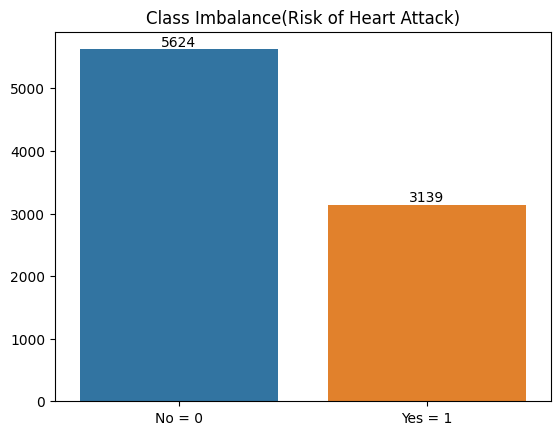

In [ ]:
labels = ["No = 0", "Yes = 1"]
values = df["Heart Attack Risk"].value_counts().to_numpy()

ax = sns.barplot(x = labels, y = values, hue=labels)

for j in ax.containers:
    ax.bar_label(j,)

plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

## Nhận xét

Dataset gốc có 26 cột, 8763 dòng
Chủ đề chính là dự đoán nguy cơ đau tim nên ta chọn Heart Attack Risk làm cột phân loại (25 features & 1 class).
Dataset bao gồm cả feature phân loại và định lượng.
Heart Attack Risk chỉ bao gồm 0 & 1 nên đây là vấn đề binary classification.

- Data không khiếm khuyết.
- Không có outlier.
- Blood Pressure cần được chuẩn hóa lại định dạng (đang là text), tách thành 2 cột định lượng.
- Có sự mất cân bằng ở Heart Attack Risk.

# EDA - Phân tích mô tả và Phân tích chẩn đoán

In [ ]:
# Blood pressure datatype problem
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['BP_Systolic', 'BP_Diastolic']] = df[['BP_Systolic', 'BP_Diastolic']].apply(pd.to_numeric)

df = df.drop("Blood Pressure", axis = 1)

In [ ]:
categorical_col.remove('Blood Pressure')

# Add 'BP_Systolic','BP_Diastolic'
# Remove categorical label-encoded columns 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use'
numerical_col = ['Age', 'Cholesterol', 'Heart Rate',  'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', \
                 'BP_Systolic', 'BP_Diastolic', \
                 'Heart Attack Risk']

## Đặc trưng các feature phân loại

In [ ]:
#Remove unecessary features Patient ID, Country, Continent, Hemisphere
categorical_col = categorical_col[1:-3]

cat2_col = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']
categorical_col+=cat2_col

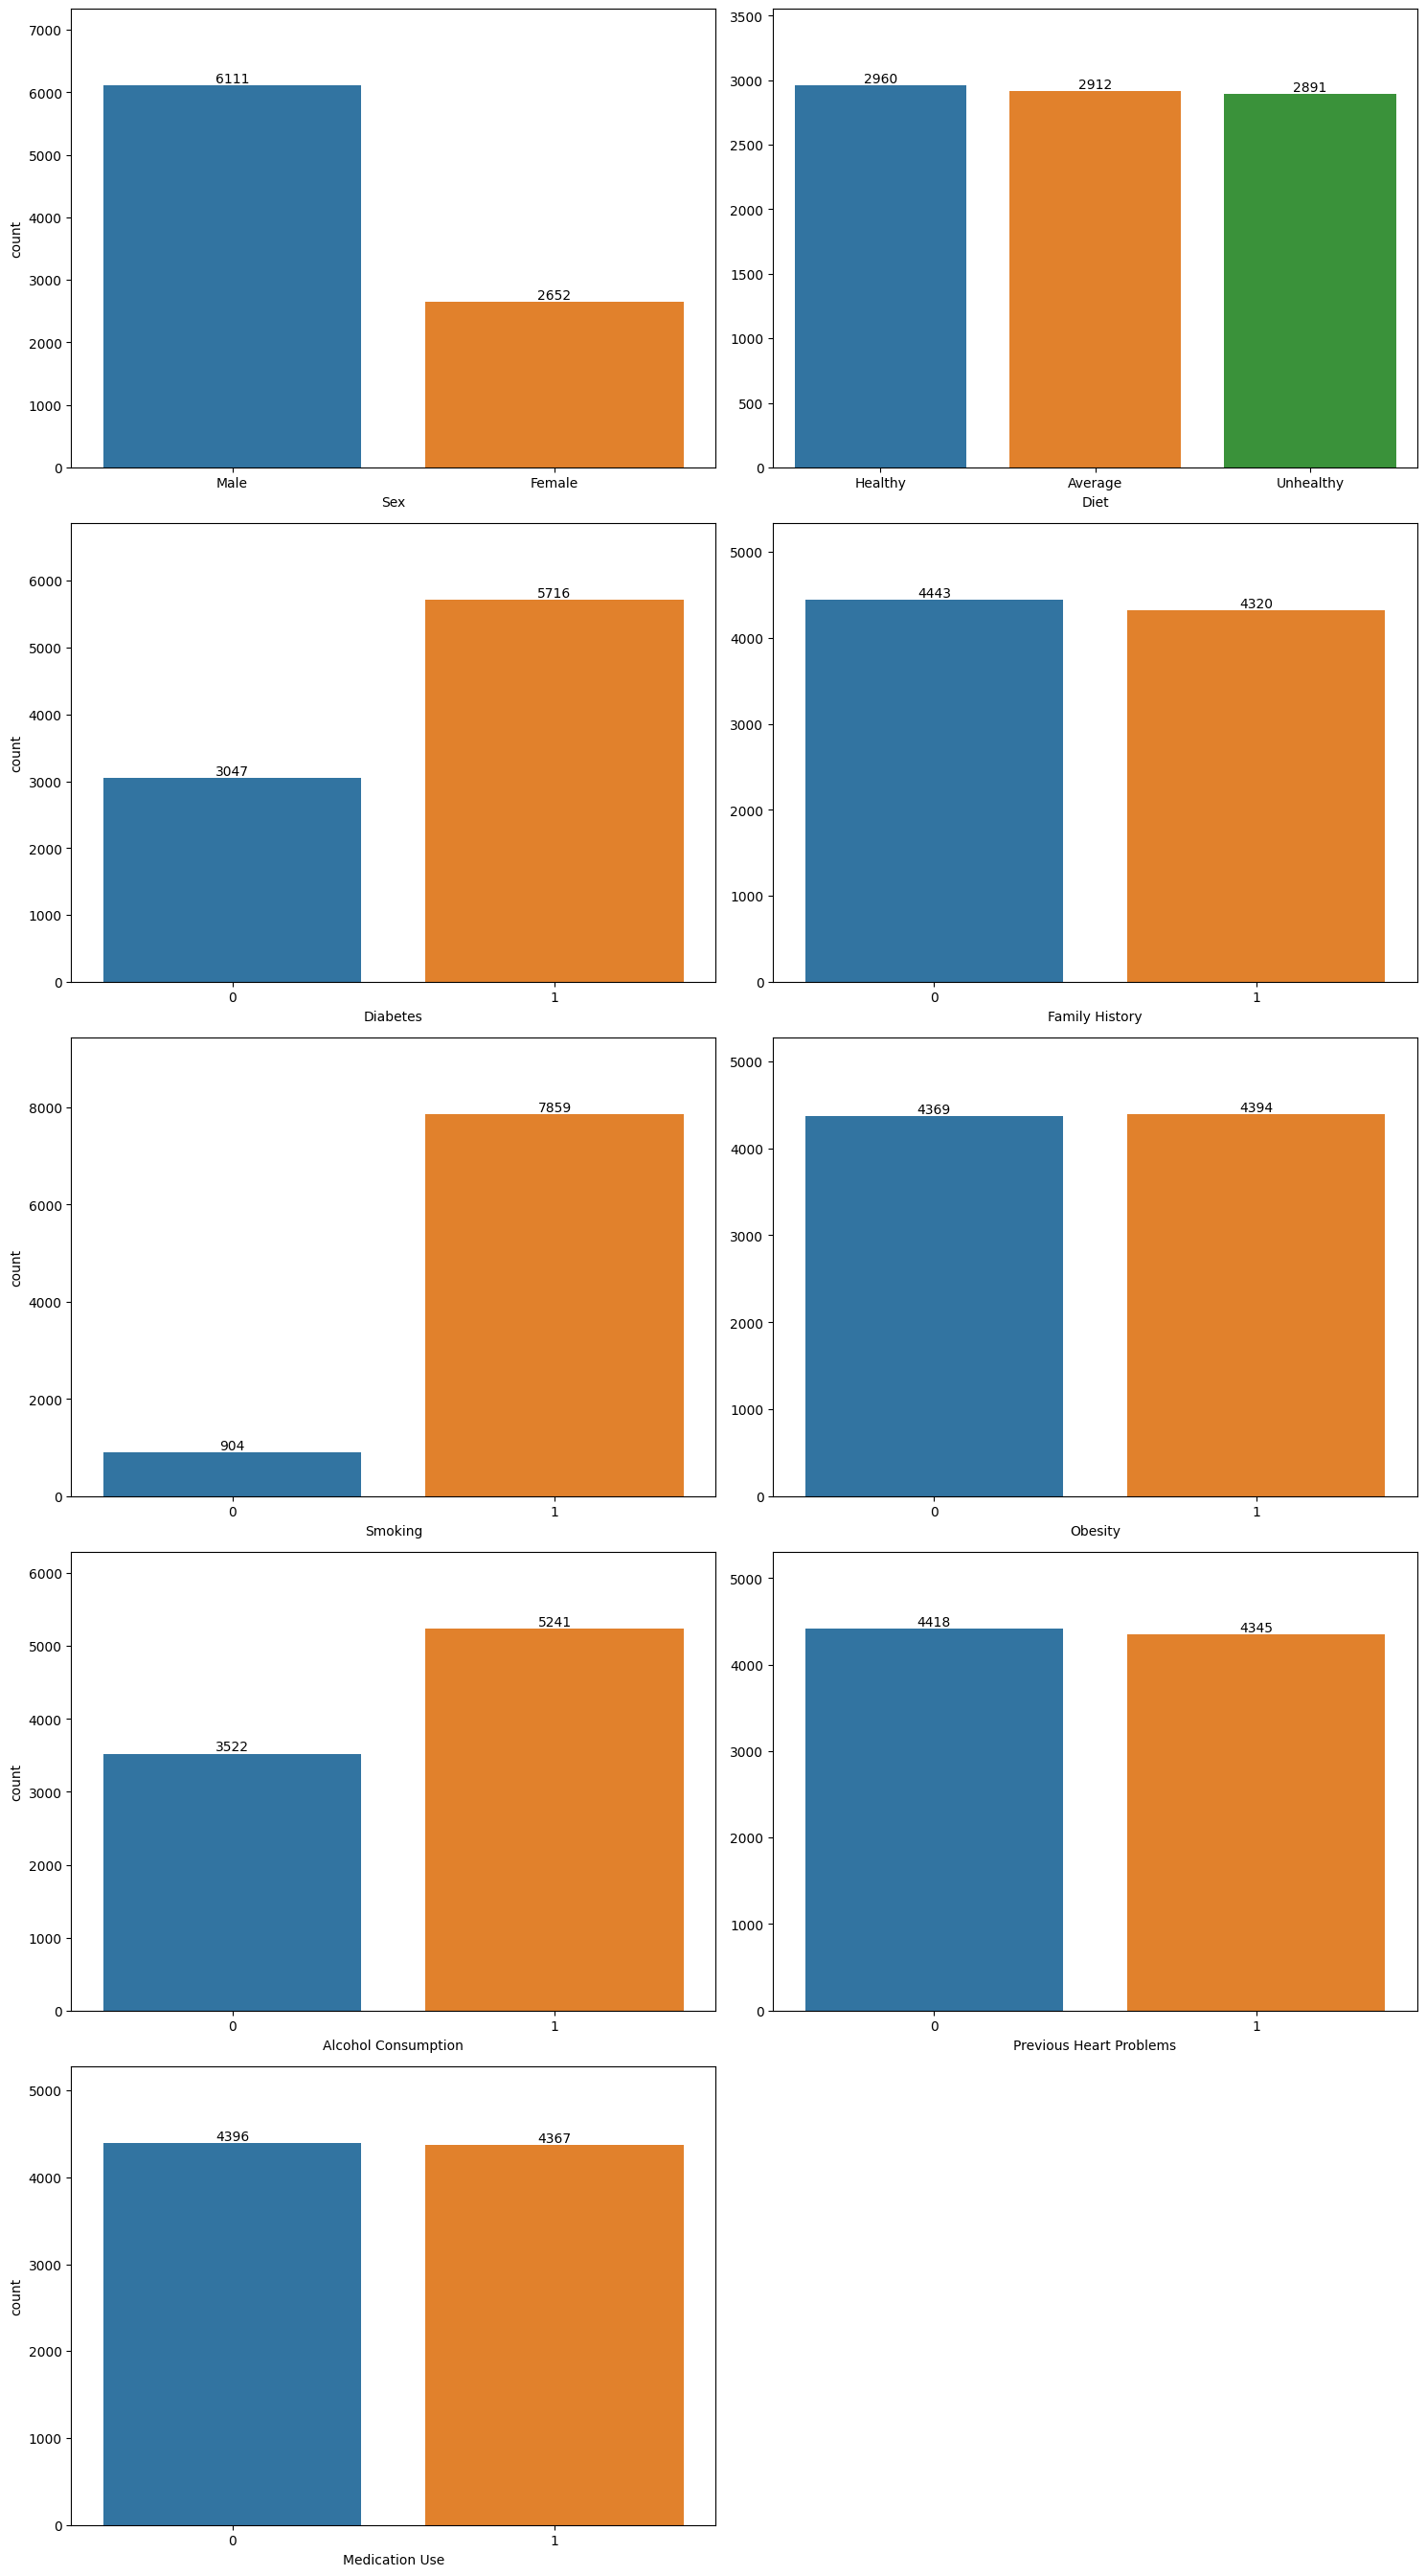

In [ ]:
ctg_data = df[categorical_col]

plt.figure(figsize=(15, 27))
k= 1
coll = len(ctg_data.columns)

for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    plt.subplot(coll // 2 + 1, 2, k)
    chart = sns.barplot(x = ctg_num.index, y = ctg_num, hue = ctg_num.index, legend=False)

    k+=1
    if k % 2 != 0: plt.ylabel(None)
    for j in chart.containers:
        chart.bar_label(j,)

    if i in ['Continent', 'Country']: chart=plt.setp(chart.get_xticklabels(), rotation=90)
    plt.ylim(0, max(ctg_num)*1.2)

plt.tight_layout()
plt.show()

In [ ]:
# Encoding Diet, Sex column for next step (correlation)
df['Diet'] = df['Diet'].map({'Healthy': 2,'Average': 1,'Unhealthy': 0})

df['Sex'] = df['Sex'].map({'Female': 0,'Male': 1})

In [ ]:
c_c = ['Sex', 'Diet', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']

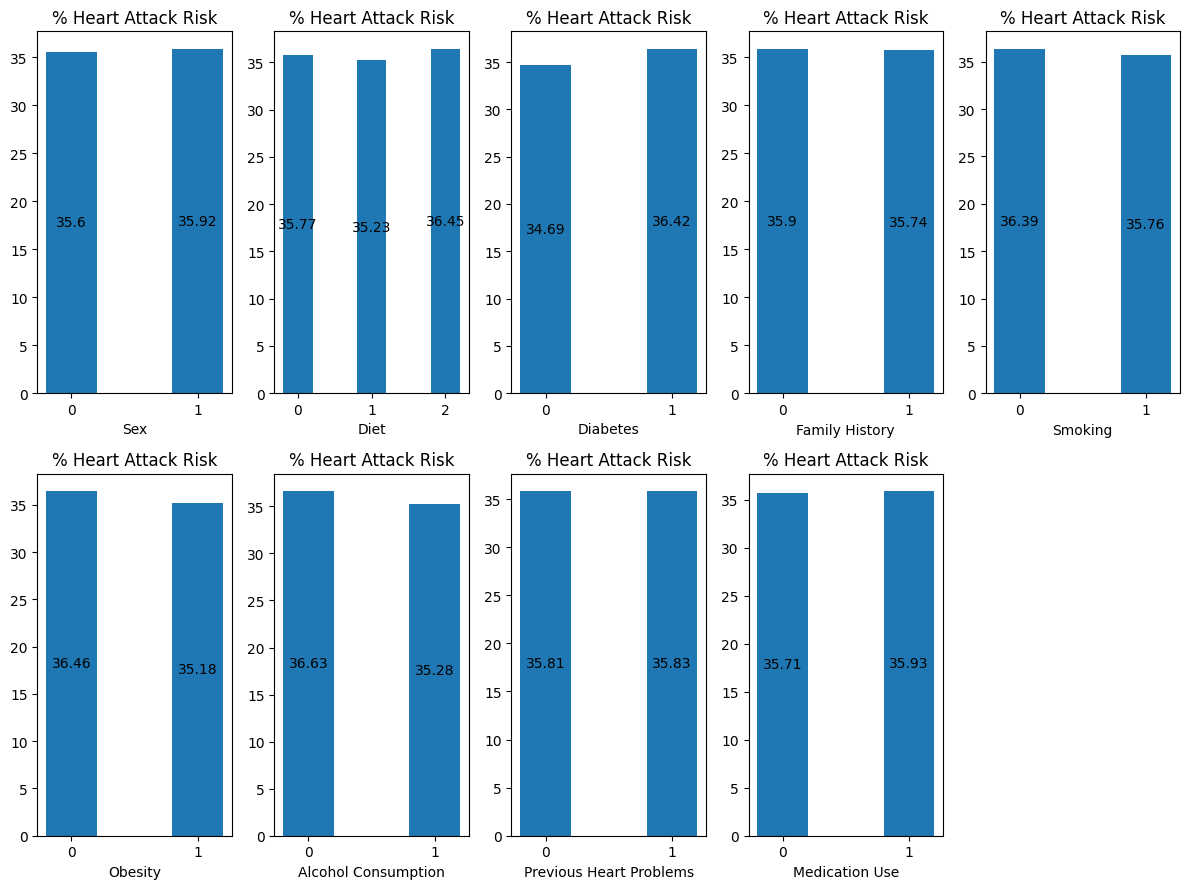

In [ ]:
plt.figure(figsize=(12, 9))

core = "Heart Attack Risk"
f_list = c_c
for k in range(len(f_list)):
    ax = plt.subplot(len(f_list)//5+1, 5, k+1)
    res = [round(100 * i / (i + j),2) for i, j in zip(df[df[core]==1].groupby(f_list[k]).count().reset_index()[core].to_list(), \
                                df[df[core]!=1].groupby(f_list[k]).count().reset_index()[core].to_list())]
    X_list= sorted(df[f_list[k]].unique())
    X_axis = np.arange(len(X_list))
    p = plt.bar(X_axis, res, 0.4, label = '%'+core)
    plt.xticks(X_axis, X_list)
    ax.bar_label(p, label_type="center")
    plt.title('% Heart Attack Risk')
    plt.xlabel(f_list[k])

plt.tight_layout()
plt.show()

## Đặc trưng các feature định lượng

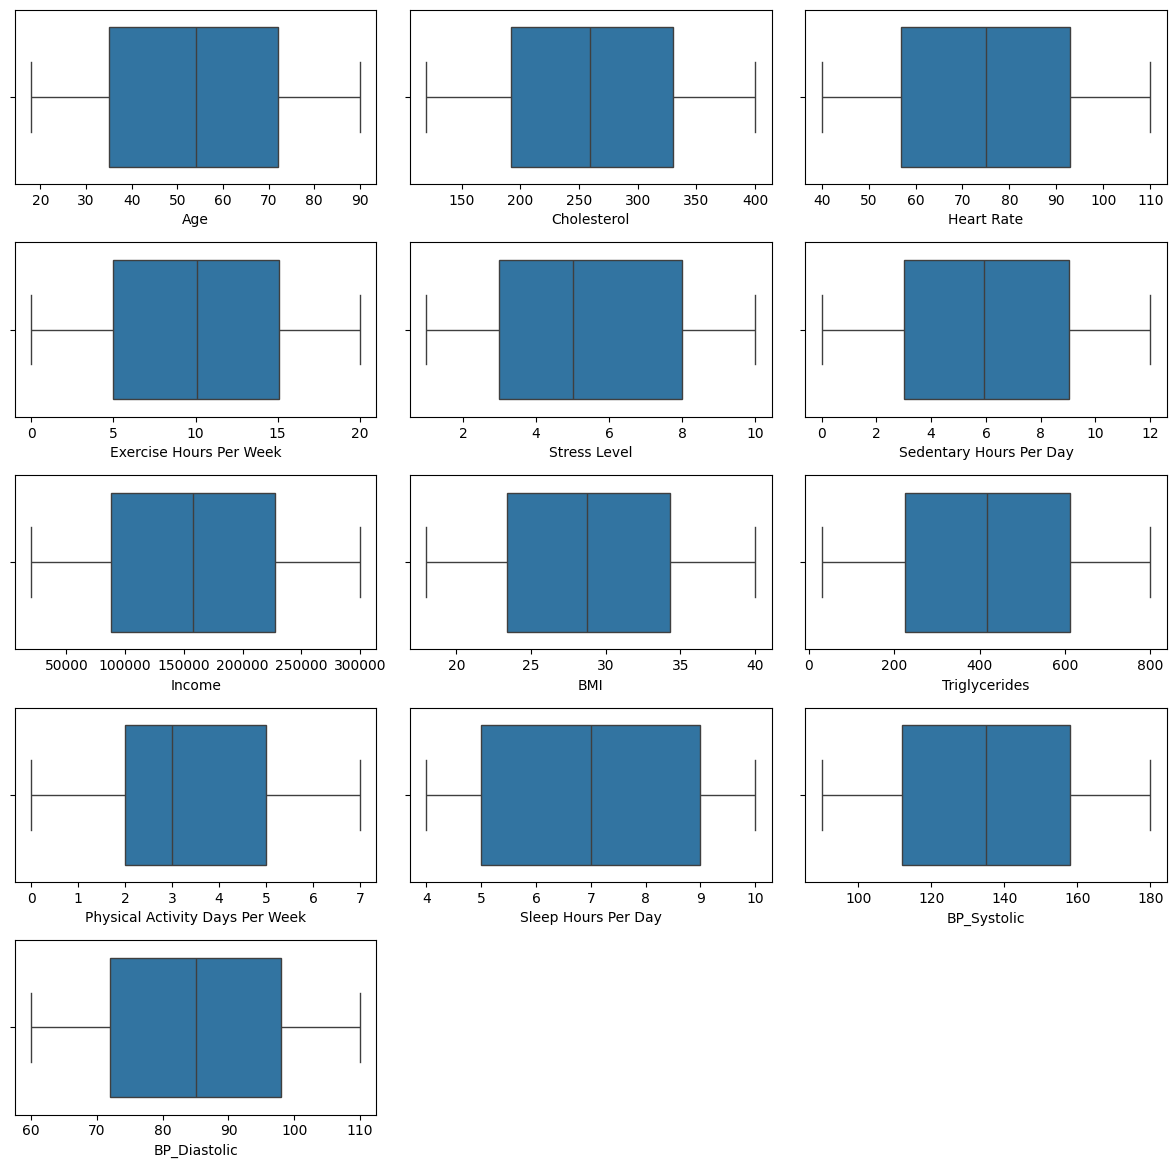

In [ ]:
plt.figure(figsize=(12, 16))
for feature in numerical_col[:-1]:
    plt.subplot(7, 3, numerical_col.index(feature) + 1)
    sns.boxplot(x=df[feature])
    # plt.title(feature)
plt.tight_layout()
plt.show()

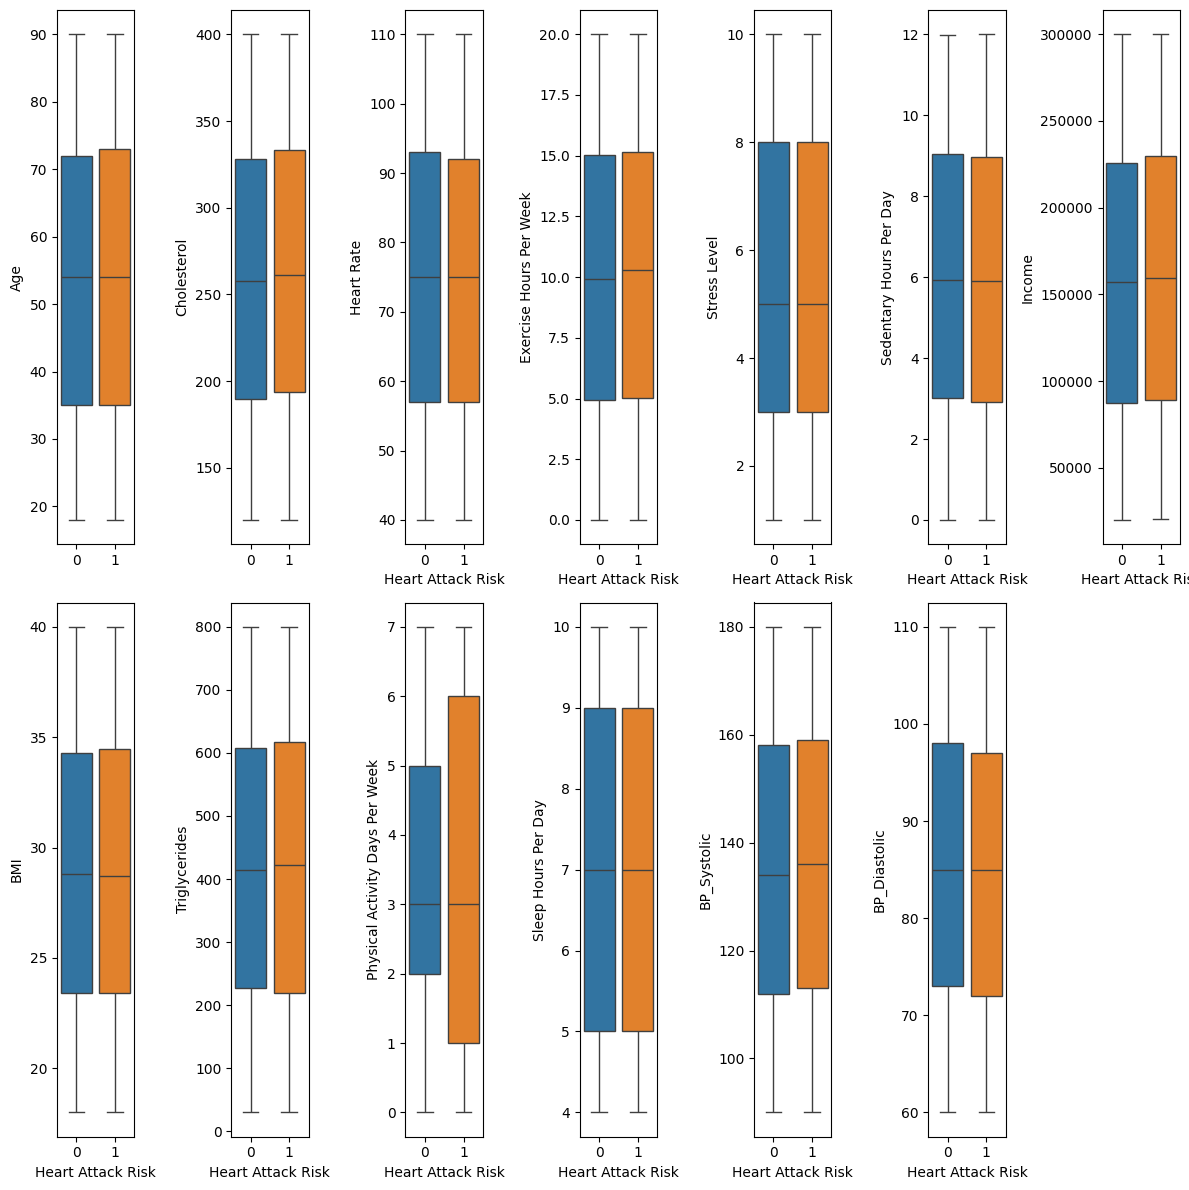

In [ ]:
plt.figure(figsize=(12, 12))
f_list = numerical_col[:-1]
core = 'Heart Attack Risk'
for k in range(len(f_list)):
    plt.subplot(len(f_list)//7+1, 7, k+1)
    sns.boxplot(y=f_list[k], x=core,hue=core,data=df, legend=False)
    if k<2: plt.xlabel(None)

plt.tight_layout()
plt.show()

## Tương quan các feature - Correlation

In [ ]:
reorder_col = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',\
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',\
       'BP_Systolic', 'BP_Diastolic', 'Heart Attack Risk']

df_c = df[reorder_col]

<Axes: >

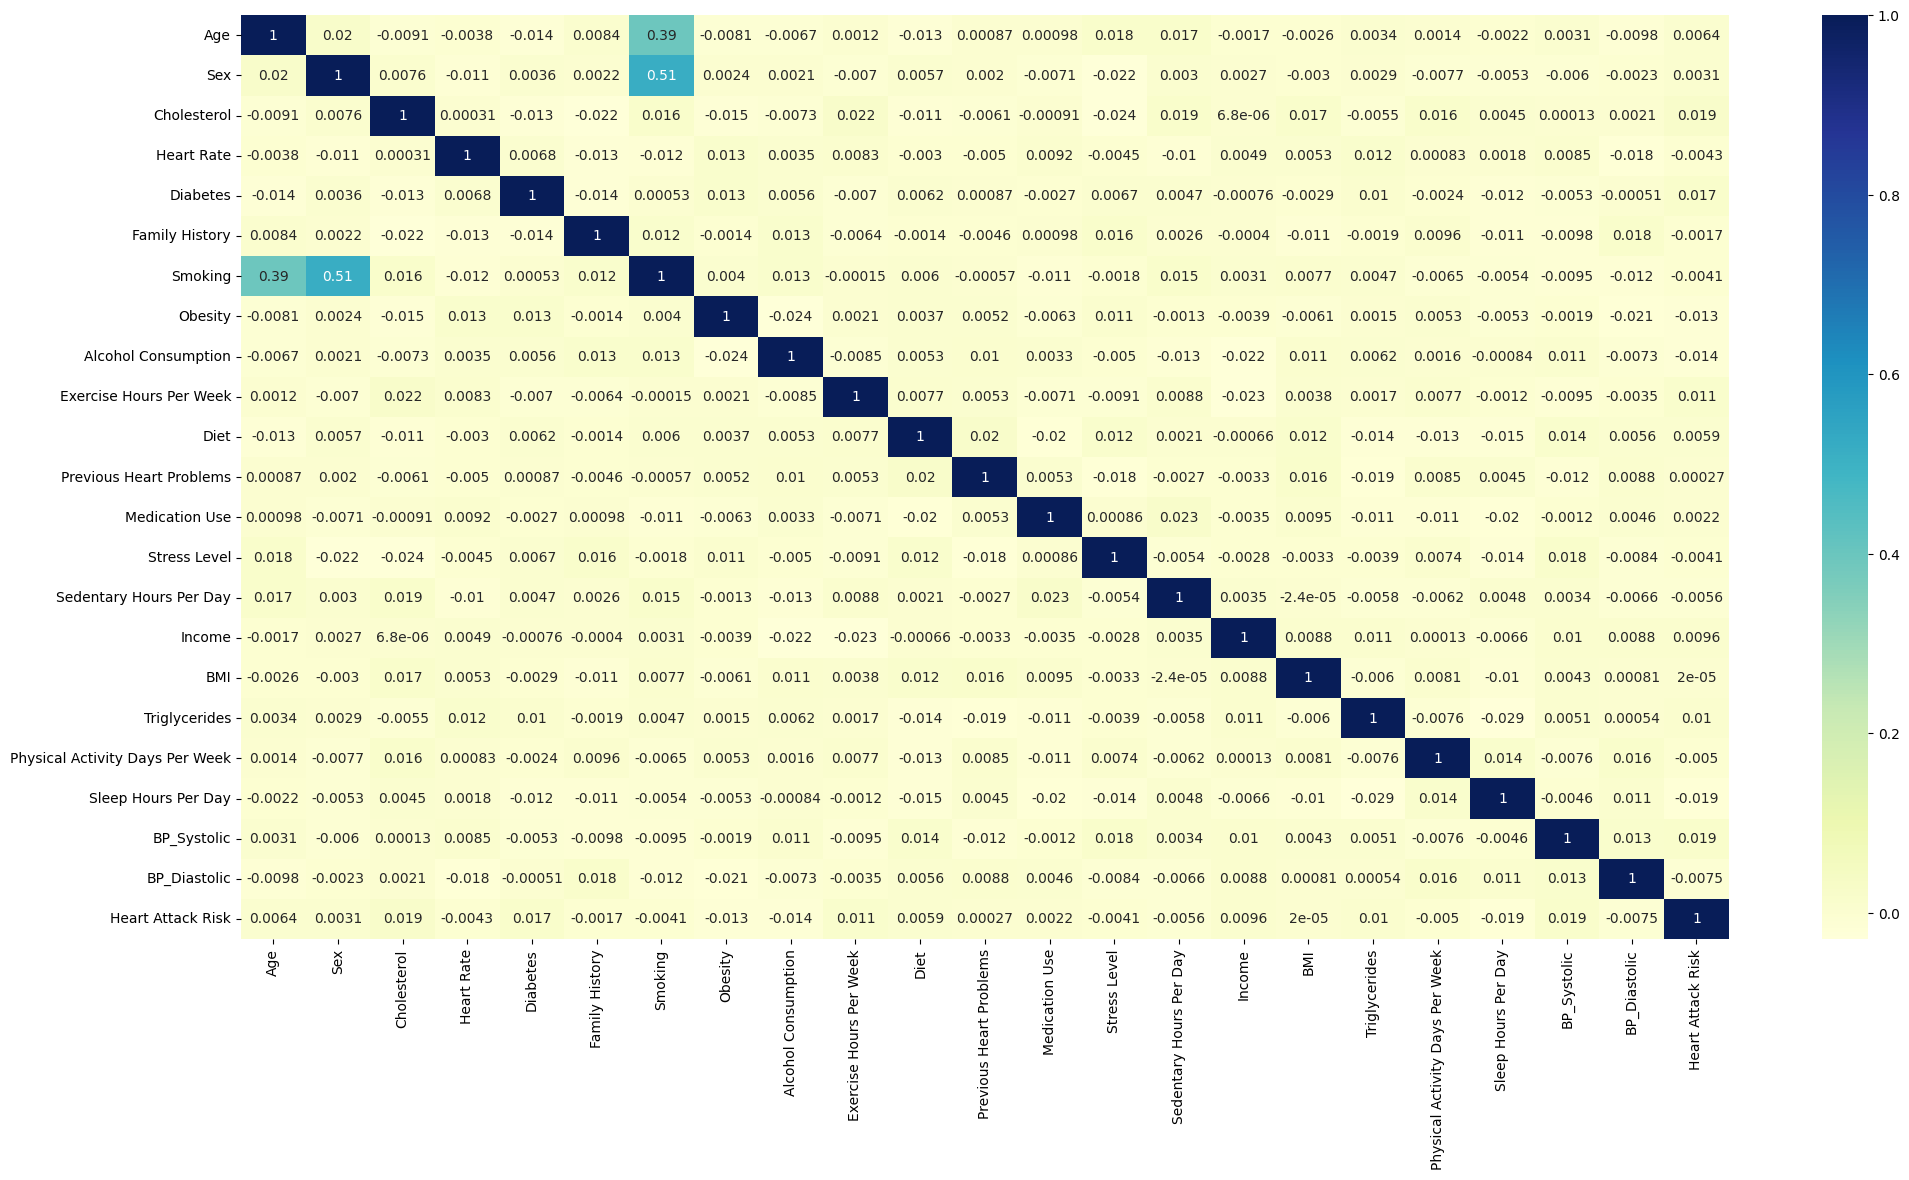

In [ ]:
show_df_corr = df_c.corr(numeric_only=True)

plt.figure(figsize = (24, 12))
sns.heatmap(show_df_corr, cmap='YlGnBu', annot=True)

In [ ]:
def correlation(df, threshold):
    coll_corr=set()
    corr_matrix=df.corr(numeric_only = True)
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr

In [ ]:
corr_feature = correlation(df_c, 0.9)
print(corr_feature)

set()


In [ ]:
har_corr = df_c.corr()['Heart Attack Risk']
order = har_corr.abs().sort_values(ascending=False)
har_corr[order.index]

Heart Attack Risk                  1.000000
Cholesterol                        0.019340
BP_Systolic                        0.018585
Sleep Hours Per Day               -0.018528
Diabetes                           0.017225
Alcohol Consumption               -0.013778
Obesity                           -0.013318
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
BP_Diastolic                      -0.007509
Age                                0.006403
Diet                               0.005908
Sedentary Hours Per Day           -0.005613
Physical Activity Days Per Week   -0.005014
Heart Rate                        -0.004251
Stress Level                      -0.004111
Smoking                           -0.004051
Sex                                0.003095
Medication Use                     0.002234
Family History                    -0.001652
Previous Heart Problems            0.000274
BMI                             

## Các đặc điểm

- Với các feature phân loại Sex, Diabetes, Smoking, Alcohol Consumption có số lượng chênh lệch khá cao. Thể hiện mức độ quan tâm về sức khỏe tim mạch của các nhóm feature, các feature còn lại không mang lại nhiều giá trị để so sánh.
- Nguy cơ bị tim ảnh hưởng bởi Cholesterol #1, BP_Systolic #2, Diabetes #4, Triglycerides #8, các feature này cần phải đo khám.
- Ngoài ra còn Sleep Hours Per Day #3, Alcohol Consumption #5, Obesity #6, Excercise Hours Per Week #7, các feature này mỗi người có thể chủ động theo dõi.
- Smoking dù không tốt nhưng cũng không phải nguyên nhân chính.

## Phân tích theo Cholesterol, BP_Systolic, Triglycerides, Excercise Hours Per Week

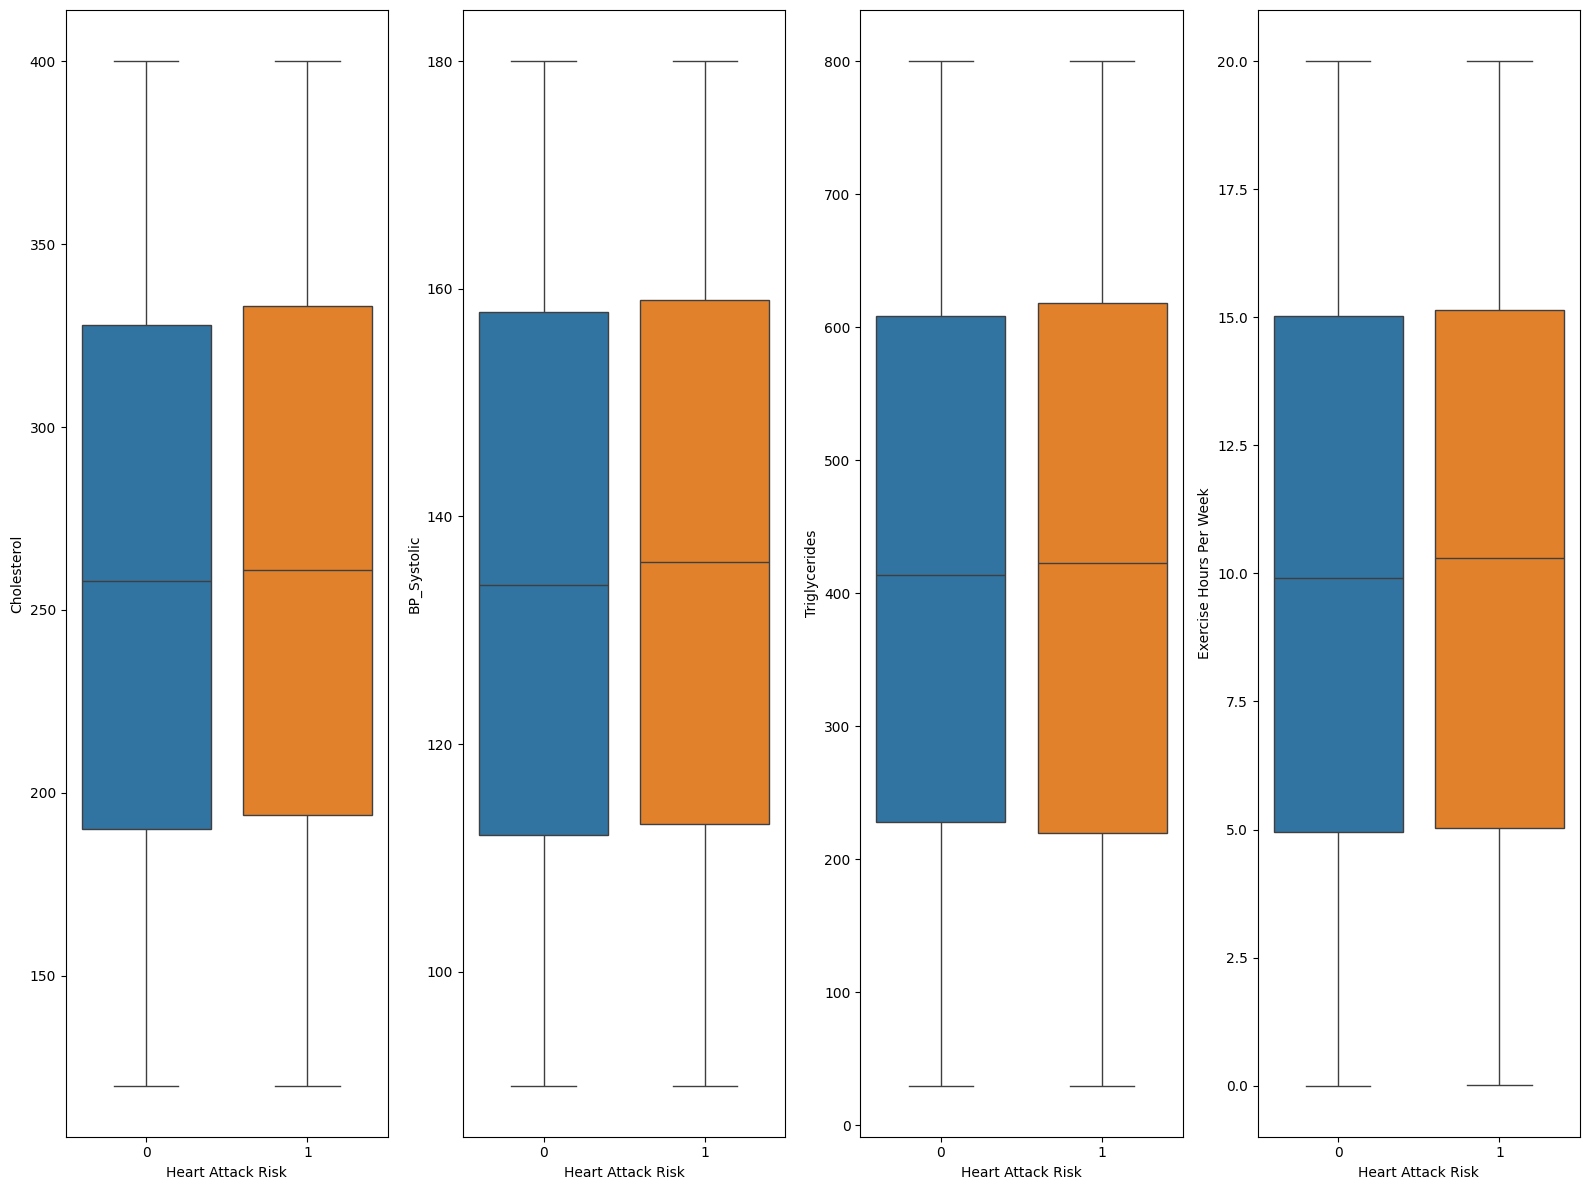

In [ ]:
plt.figure(figsize=(16, 12))
f_list = ['Cholesterol', 'BP_Systolic', 'Triglycerides', 'Exercise Hours Per Week']
core = 'Heart Attack Risk'
for k in range(4):
    plt.subplot(1, 4, k+1)
    sns.boxplot(y=f_list[k], x=core,hue=core,data=df, legend=False)

plt.tight_layout()
plt.show()

## Phân tích theo Diabetes, Sleep Hours Per Day, Alcohol Consumption, Obesity

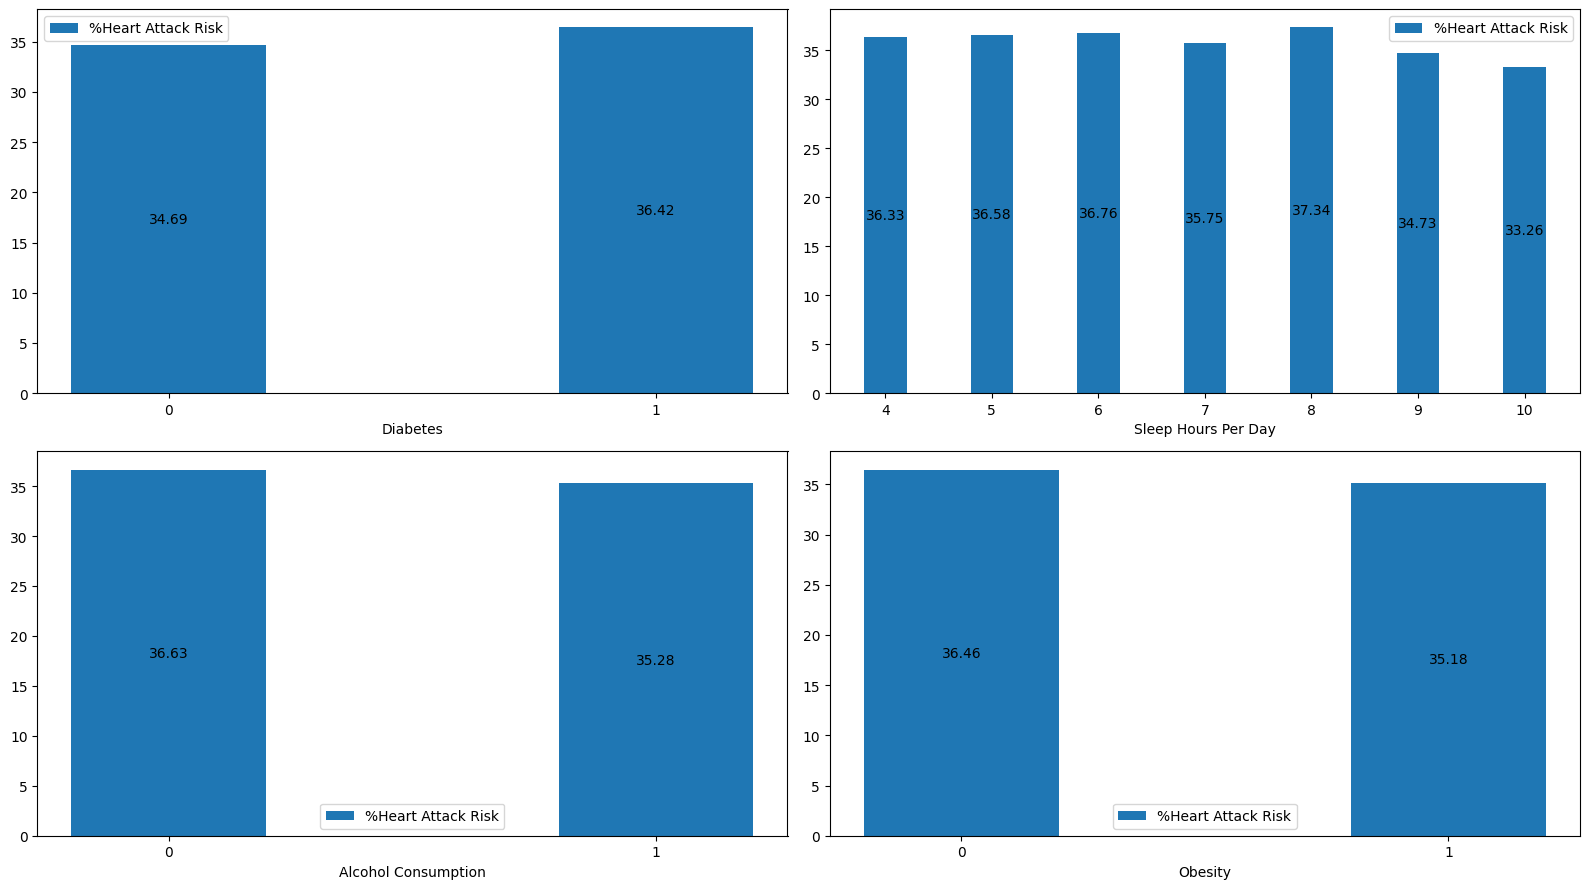

In [ ]:
plt.figure(figsize=(16, 9))

core = "Heart Attack Risk"
f_list = ['Diabetes', 'Sleep Hours Per Day', 'Alcohol Consumption', 'Obesity']
for k in range(4):
    ax = plt.subplot(2, 2, k+1)
    res = [round(100 * i / (i + j),2) for i, j in zip(df[df[core]==1].groupby(f_list[k]).count().reset_index()[core].to_list(), \
                                df[df[core]!=1].groupby(f_list[k]).count().reset_index()[core].to_list())]
    X_list= sorted(df[f_list[k]].unique())
    X_axis = np.arange(len(X_list))
    p = plt.bar(X_axis, res, 0.4, label = '%'+core)
    plt.xticks(X_axis, X_list)
    ax.bar_label(p, label_type="center")
    plt.legend()
    plt.xlabel(f_list[k])

plt.tight_layout()
plt.show()

## Nhận xét

- Cholesterol, BP_Systolic và EHpW có ảnh hưởng đến tỷ lệ bệnh, chỉ số càng cao thì nguy cơ càng lớn. Riêng Triglycerides các chỉ số quá thấp hoặc quá cao đều tăng tỷ lệ bệnh.
- Diabetes cũng là tác nhân tăng tỷ lệ bệnh. Obesity lại cho kết quả ngược lại, có thể kết luận người bị tiểu đường nhưng phải không béo phì sẽ có tỷ lệ bệnh tim cao hơn.
- Alcohol Consumption cho kết quả khó tin, nguyên nhân có thể do data đầu vào chưa đủ chi tiết (câu hỏi uống ít hay nhiều thay vì có hay không)
- Sleep Hours Per Day cho thời gian ngủ lý tưởng để bảo vệ tim là 7, 9, 10 tiếng. Ngủ 8 tiếng nguy cơ cao nhất có thể do nguyên nhân khác.
* Thiếu ngủ, vận động quá sức hoặc quá ít vận động đều có thể tăng tỷ lệ bệnh.

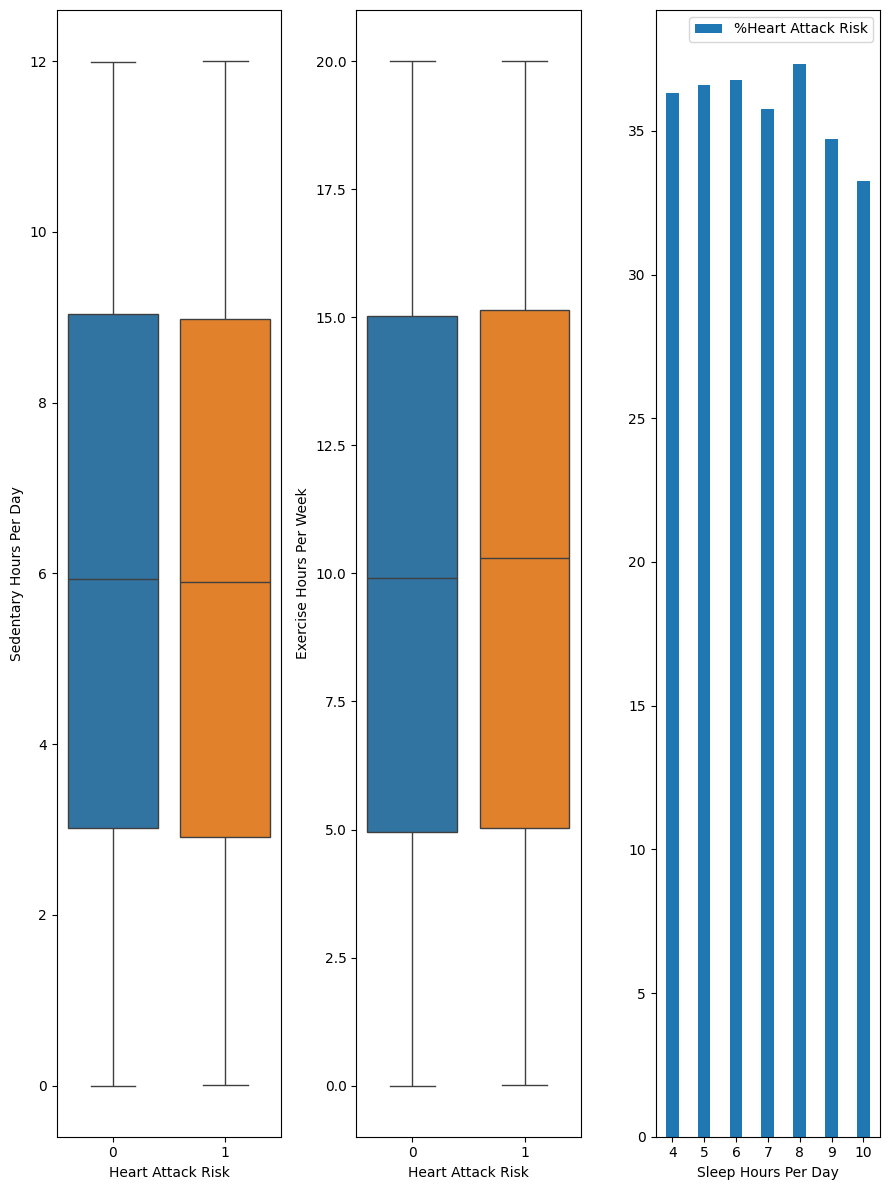

In [ ]:
#Sleep hours per day confused
plt.figure(figsize=(9, 12))
f_list = ['Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Sleep Hours Per Day']
core = 'Heart Attack Risk'
for k in range(3):
    if k>1:
        ax = plt.subplot(1, 3, k+1)
        res = [round(100 * i / (i + j),2) for i, j in zip(df[df[core]==1].groupby(f_list[k]).count().reset_index()[core].to_list(), \
                                    df[df[core]!=1].groupby(f_list[k]).count().reset_index()[core].to_list())]
        X_list= sorted(df[f_list[k]].unique())
        X_axis = np.arange(len(X_list))
        p = plt.bar(X_axis, res, 0.4, label = '%'+core)
        plt.xticks(X_axis, X_list)
        plt.legend()
        plt.xlabel(f_list[k])
    else:
        ax = plt.subplot(1, 3, k+1)
        sns.boxplot(y=f_list[k], x=core,hue=core,data=df, legend=False)

plt.tight_layout()
plt.show()

# Áp dụng model Machine Learning để phân tích

## Data preparing

In [ ]:
last_len = len(df_c.columns)-1
#One-hot encoding for nominal data values
df_pre = pd.get_dummies(df_c, columns = ['Sex'])

encoded_col = df_pre.columns[last_len:].tolist()
df_pre[encoded_col] = df_pre[encoded_col].astype(int)

In [ ]:
reorder_col = ['Age', 'Sex_0', 'Sex_1', 'Cholesterol', 'BP_Systolic', 'BP_Diastolic', \
               'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']

df_pre = df_pre[reorder_col]

In [ ]:
categorical_col = ['Sex_0', 'Sex_1', 'Diet', \
                   'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']

In [ ]:
X = df_pre[reorder_col].drop(['Heart Attack Risk'],axis=1)

# y = df_pre['Heart Attack Risk'].values
y = df_pre['Heart Attack Risk']

## So sánh các phương pháp chọn feature

### Chọn feature bằng RFE (Recursive feature elimination, đệ quy) với Random Forest

In [ ]:
top_features = 10

X_rfe = X.copy()
y_rfe = y.copy()

In [ ]:
rf_estimator = RandomForestClassifier()
rfe = RFE(estimator=rf_estimator, n_features_to_select=top_features, step=1)
rfe = rfe.fit(X_rfe, y_rfe)
print('10 feature tốt nhất theo RFE:', X_rfe.columns[rfe.support_])

10 feature tốt nhất theo RFE: Index(['Age', 'Cholesterol', 'BP_Systolic', 'BP_Diastolic', 'Heart Rate',
       'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides'],
      dtype='object')


In [ ]:
rfe_features = list(X_rfe.columns[rfe.support_])

print(rfe_features)

['Age', 'Cholesterol', 'BP_Systolic', 'BP_Diastolic', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides']


### Chọn feature bằng Correlation

In [ ]:
c_features = ['Cholesterol','BP_Systolic','Sleep Hours Per Day','Diabetes','Alcohol Consumption','Obesity','Exercise Hours Per Week','Triglycerides','Income','BP_Diastolic']

print(c_features)

['Cholesterol', 'BP_Systolic', 'Sleep Hours Per Day', 'Diabetes', 'Alcohol Consumption', 'Obesity', 'Exercise Hours Per Week', 'Triglycerides', 'Income', 'BP_Diastolic']


### Chọn feature theo UX

In [ ]:
r_features = ['Sleep Hours Per Day', 'Alcohol Consumption', 'Obesity', 'Exercise Hours Per Week']

### Kết luận

-Các feature theo RFE thiếu độ tin cậy do một số feature đi ngược với EDA và DDA.
-Tiến hành xử lý theo 2 cách chọn features

## Chia tệp

In [ ]:
X_c = X[c_features].copy()
X_c

,Cholesterol,BP_Systolic,Sleep Hours Per Day,Diabetes,Alcohol Consumption,Obesity,Exercise Hours Per Week,Triglycerides,Income,BP_Diastolic
0,208,158,6,0,0,0,4.168189,286,261404,88
1,389,165,7,1,1,1,1.813242,235,285768,93
2,324,174,4,1,0,0,2.078353,587,235282,99
3,383,163,4,1,1,0,9.828130,378,125640,100
4,318,91,5,1,0,1,5.804299,231,160555,88
...,...,...,...,...,...,...,...,...,...,...
8758,121,94,7,1,1,0,7.917342,67,235420,76
8759,120,157,9,1,0,1,16.558426,617,217881,102
8760,250,161,4,0,1,1,3.148438,527,36998,75
8761,178,119,8,1,0,0,3.789950,114,209943,67


In [ ]:
X_r = X[r_features].copy()
X_r

,Sleep Hours Per Day,Alcohol Consumption,Obesity,Exercise Hours Per Week
0,6,0,0,4.168189
1,7,1,1,1.813242
2,4,0,0,2.078353
3,4,1,0,9.828130
4,5,0,1,5.804299
...,...,...,...,...
8758,7,1,0,7.917342
8759,9,0,1,16.558426
8760,4,1,1,3.148438
8761,8,0,0,3.789950


## So sánh các kiểu setup models

In [ ]:
models = {'LogisticRegression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(random_state=42, n_estimators = 300, max_depth = 30, criterion = 'entropy'),
          'SVM': SVC(kernel = 'rbf'),
          'KNN': KNeighborsClassifier(n_neighbors = 10)}

### ALL features split data -> standardize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.3)

In [ ]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
resultsacc1 = []
resultsacc2 = []

In [ ]:
for i in models:
    obj = models[i]

    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = obj.score(X_train, y_train)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

Accuracy of LogisticRegression:  0.6432103461392165 . Precision of LogisticRegression:  1.0
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

ROC_AUC_SCORE is 0.5
Accuracy of DecisionTreeClassifier:  0.5154050969950551 . Precision of DecisionTreeClassifier:  0.33098591549295775
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1691
           1       0.33      0.35      0.34       938

    accuracy                           0.52      2629
   macro avg       0.48      0.48      0.48      2629
weighted avg       0.52      0.52      0.52      2629

ROC_AUC_SCORE is 0.4787439208452121


d:\da44test\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\da44test\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\da44test\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of RandomForestClassifier:  0.6386458729554964 . Precision of RandomForestClassifier:  0.3888888888888889
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1691
           1       0.39      0.02      0.04       938

    accuracy                           0.64      2629
   macro avg       0.52      0.50      0.41      2629
weighted avg       0.55      0.64      0.52      2629

ROC_AUC_SCORE is 0.5014364899335375
Accuracy of SVM:  0.6428299733739065 . Precision of SVM:  0.0
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

ROC_AUC_SCORE is 0.4997043169722058
Accuracy of KNN:  0.604412324077596 . Precision of KNN:  0.31785714285714284
              precis

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
0,LogisticRegression,0.356790,0.641180,0.643210
3,SVM,0.357170,0.647538,0.642830
2,RandomForestClassifier,0.361354,1.000000,0.638646
4,KNN,0.395588,0.671177,0.604412
1,DecisionTreeClassifier,0.484595,1.000000,0.515405


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.356790,0.597319,0.356790
1,DecisionTreeClassifier,0.484595,0.696129,0.484595
2,RandomForestClassifier,0.361354,0.601127,0.361354
3,SVM,0.357170,0.597637,0.357170
4,KNN,0.395588,0.628958,0.395588


### ALL features resampling -> split data

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)

In [ ]:
resultsacc1 = []
resultsacc2 = []

In [ ]:
for i in models:
    obj = models[i]

    # obj.fit(X_train, y_resample)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = obj.score(X_train, y_train)
    # acctrs = obj.score(X_train, y_resample)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

d:\da44test\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression:  0.5029633620689655 . Precision of LogisticRegression:  0.5028344671201814
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1857
           1       0.50      0.48      0.49      1855

    accuracy                           0.50      3712
   macro avg       0.50      0.50      0.50      3712
weighted avg       0.50      0.50      0.50      3712

ROC_AUC_SCORE is 0.5029500092169644
Accuracy of DecisionTreeClassifier:  0.5813577586206896 . Precision of DecisionTreeClassifier:  0.5806970509383378
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1857
           1       0.58      0.58      0.58      1855

    accuracy                           0.58      3712
   macro avg       0.58      0.58      0.58      3712
weighted avg       0.58      0.58      0.58      3712

ROC_AUC_SCORE is 0.5813590885801085
Accuracy of RandomForestClassifier:  0.6699892241379

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.330011,1.000000,0.669989
1,DecisionTreeClassifier,0.418642,1.000000,0.581358
4,KNN,0.431843,0.675027,0.568157
0,LogisticRegression,0.497037,0.530387,0.502963
3,SVM,0.510506,0.510350,0.489494


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.497037,0.705008,0.497037
1,DecisionTreeClassifier,0.418642,0.647026,0.418642
2,RandomForestClassifier,0.330011,0.574466,0.330011
3,SVM,0.510506,0.714497,0.510506
4,KNN,0.431843,0.657147,0.431843


### ALL features split data -> resampling -> standardize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.33)

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [ ]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_resample)
X_test = sc.transform(X_test)

In [ ]:
resultsacc1 = []
resultsacc2 = []

In [ ]:
for i in models:
    obj = models[i]

    obj.fit(X_train, y_resample)
    # obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    # acctrs = obj.score(X_train, y_train)
    acctrs = obj.score(X_train, y_resample)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

Accuracy of LogisticRegression:  0.5636237897648686 . Precision of LogisticRegression:  0.34759358288770054
              precision    recall  f1-score   support

           0       0.64      0.74      0.68      1858
           1       0.35      0.25      0.29      1034

    accuracy                           0.56      2892
   macro avg       0.49      0.49      0.49      2892
weighted avg       0.53      0.56      0.54      2892

ROC_AUC_SCORE is 0.4944013341855909
Accuracy of DecisionTreeClassifier:  0.5169432918395575 . Precision of DecisionTreeClassifier:  0.34786253143336127
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1858
           1       0.35      0.40      0.37      1034

    accuracy                           0.52      2892
   macro avg       0.49      0.49      0.49      2892
weighted avg       0.53      0.52      0.52      2892

ROC_AUC_SCORE is 0.4913120740881087
Accuracy of RandomForestClassifier:  0.57641770401

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.423582,1.000000,0.576418
3,SVM,0.425657,0.766463,0.574343
0,LogisticRegression,0.436376,0.641131,0.563624
4,KNN,0.470263,0.736856,0.529737
1,DecisionTreeClassifier,0.483057,1.000000,0.516943


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.436376,0.660588,0.436376
1,DecisionTreeClassifier,0.483057,0.695023,0.483057
2,RandomForestClassifier,0.423582,0.650832,0.423582
3,SVM,0.425657,0.652424,0.425657
4,KNN,0.470263,0.685757,0.470263


### ALL features resampling -> split data -> standardize

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)

In [ ]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
resultsacc1 = []
resultsacc2 = []
cfm = []
auc_c = []
auc_scr = []

In [ ]:
for i in models:
    obj = models[i]

    # obj.fit(X_train, y_resample)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test) #Wrong ROC curve -> should be y_pred = obj.predict_proba(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    cfm.append(confusion_matrix(y_test,y_pred))
    auc_c.append(roc_curve(y_test,y_pred))
    auc_scr.append(roc_auc_score(y_test,y_pred))
    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = obj.score(X_train, y_train)
    # acctrs = obj.score(X_train, y_resample)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

Accuracy of LogisticRegression:  0.6325431034482759 . Precision of LogisticRegression:  0.6715583508036338
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      1857
           1       0.67      0.52      0.58      1855

    accuracy                           0.63      3712
   macro avg       0.64      0.63      0.63      3712
weighted avg       0.64      0.63      0.63      3712

ROC_AUC_SCORE is 0.6324814535806093
Accuracy of DecisionTreeClassifier:  0.5743534482758621 . Precision of DecisionTreeClassifier:  0.5733333333333334
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1857
           1       0.57      0.58      0.58      1855

    accuracy                           0.57      3712
   macro avg       0.57      0.57      0.57      3712
weighted avg       0.57      0.57      0.57      3712

ROC_AUC_SCORE is 0.5743562276924059
Accuracy of RandomForestClassifier:  0.6689116379310

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.331088,1.000000,0.668912
3,SVM,0.340517,0.759820,0.659483
0,LogisticRegression,0.367457,0.638270,0.632543
4,KNN,0.367457,0.719214,0.632543
1,DecisionTreeClassifier,0.425647,1.000000,0.574353


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.367457,0.606182,0.367457
1,DecisionTreeClassifier,0.425647,0.652416,0.425647
2,RandomForestClassifier,0.331088,0.575403,0.331088
3,SVM,0.340517,0.583539,0.340517
4,KNN,0.367457,0.606182,0.367457


### All features So sánh hiệu quả các model

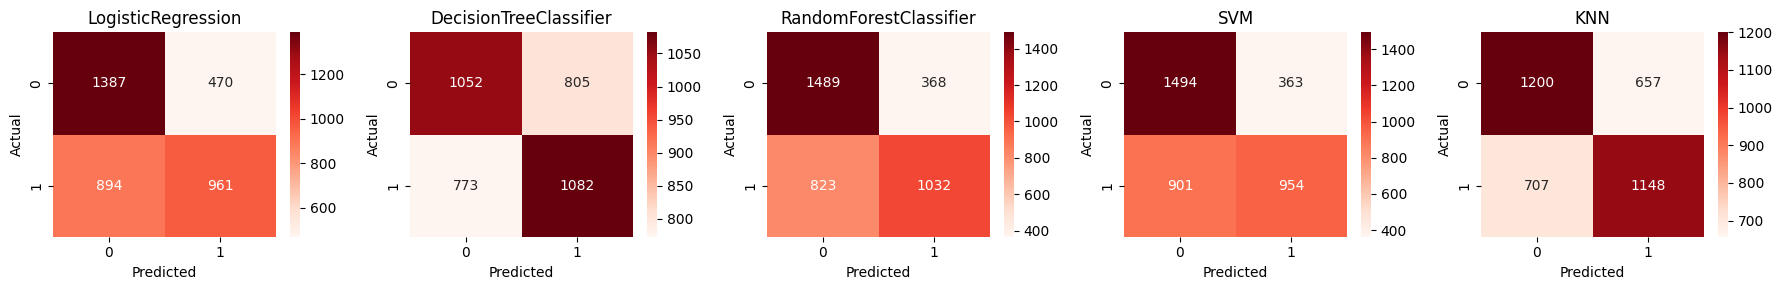

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(18, 3))

for i in range(len(models)):
    sns.heatmap(cfm[i], annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(list(models.keys())[i])

plt.tight_layout()
plt.show()

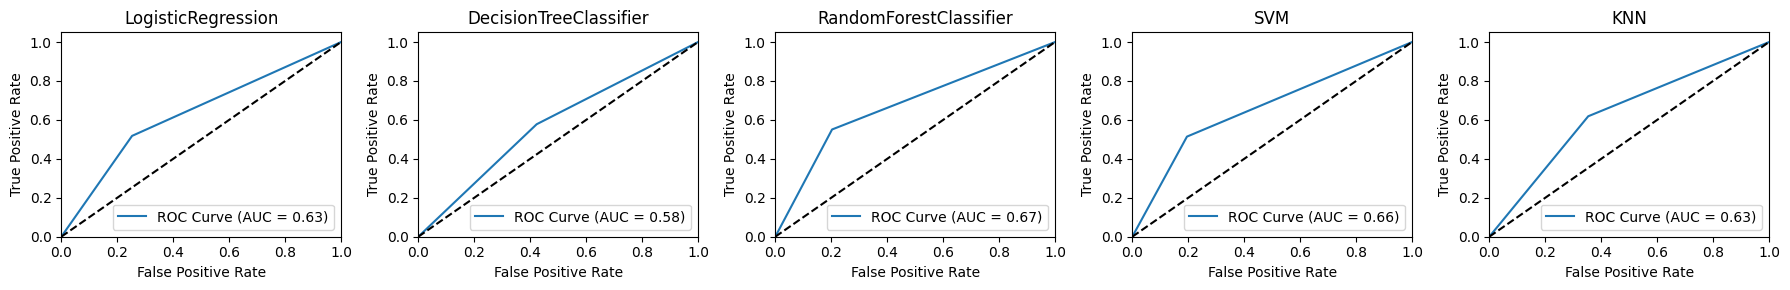

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(18, 3))
for i in range(len(models)):
    axes[i].plot(auc_c[i][0], auc_c[i][1], label=f'ROC Curve (AUC = {auc_scr[i]:.2f})') #FPR, TPR
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(list(models.keys())[i])
    axes[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

### Top 10 features resampling -> split data -> standardize

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X_c, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)

In [ ]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
resultsacc1 = []
resultsacc2 = []

In [ ]:
for i in models:
    obj = models[i]

    # obj.fit(X_train, y_resample)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = obj.score(X_train, y_train)
    # acctrs = obj.score(X_train, y_resample)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

Accuracy of LogisticRegression:  0.5853987068965517 . Precision of LogisticRegression:  0.5846730975348339
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1857
           1       0.58      0.59      0.59      1855

    accuracy                           0.59      3712
   macro avg       0.59      0.59      0.59      3712
weighted avg       0.59      0.59      0.59      3712

ROC_AUC_SCORE is 0.5854001831780964
Accuracy of DecisionTreeClassifier:  0.5546875 . Precision of DecisionTreeClassifier:  0.5525494276795005
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1857
           1       0.55      0.57      0.56      1855

    accuracy                           0.55      3712
   macro avg       0.55      0.55      0.55      3712
weighted avg       0.55      0.55      0.55      3712

ROC_AUC_SCORE is 0.5546970957127326
Accuracy of RandomForestClassifier:  0.6174568965517241 . Pre

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.382543,1.000000,0.617457
3,SVM,0.402748,0.665074,0.597252
0,LogisticRegression,0.414601,0.584528,0.585399
4,KNN,0.432381,0.679804,0.567619
1,DecisionTreeClassifier,0.445312,1.000000,0.554688


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.414601,0.643895,0.414601
1,DecisionTreeClassifier,0.445312,0.667317,0.445312
2,RandomForestClassifier,0.382543,0.618501,0.382543
3,SVM,0.402748,0.634624,0.402748
4,KNN,0.432381,0.657557,0.432381


### Top 4 features resampling -> split data -> standardize

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X_r, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)

In [ ]:
#Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
resultsacc1 = []
resultsacc2 = []
cfm = []
auc_c = []
auc_scr = []

In [ ]:
for i in models:
    obj = models[i]

    # obj.fit(X_train, y_resample)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    cfm.append(confusion_matrix(y_test,y_pred))
    auc_c.append(roc_curve(y_test,y_pred))
    auc_scr.append(roc_auc_score(y_test,y_pred))

    precision = precision_score(y_test,y_pred,zero_division=1)

    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)

    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = obj.score(X_train, y_train)
    # acctrs = obj.score(X_train, y_resample)
    acctes = obj.score(X_test, y_test)

    resultsacc1.append({'Model': i, 'MeanAbsoluteError': mae, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': i, 'MeanSquaredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})

    print('Accuracy of '+i+': ',accuracy,'. Precision of '+i+': ',precision)
    print(classification_report(y_test,y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)

Accuracy of LogisticRegression:  0.501885775862069 . Precision of LogisticRegression:  0.5016251354279523
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1857
           1       0.50      0.50      0.50      1855

    accuracy                           0.50      3712
   macro avg       0.50      0.50      0.50      3712
weighted avg       0.50      0.50      0.50      3712

ROC_AUC_SCORE is 0.5018843249190431
Accuracy of DecisionTreeClassifier:  0.5638469827586207 . Precision of DecisionTreeClassifier:  0.5650496141124587
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1857
           1       0.57      0.55      0.56      1855

    accuracy                           0.56      3712
   macro avg       0.56      0.56      0.56      3712
weighted avg       0.56      0.56      0.56      3712

ROC_AUC_SCORE is 0.5638409050333335
Accuracy of RandomForestClassifier:  0.58028017241379

In [ ]:
results1_df.sort_values(by='MeanAbsoluteError')

,Model,MeanAbsoluteError,AccuracyTraining,AccuracyTesting
2,RandomForestClassifier,0.419720,0.999602,0.580280
1,DecisionTreeClassifier,0.436153,1.000000,0.563847
4,KNN,0.441541,0.676486,0.558459
3,SVM,0.487608,0.532378,0.512392
0,LogisticRegression,0.498114,0.521099,0.501886


In [ ]:
results2_df

,Model,MeanSquaredError,RootMeanSquareError,MeanAbsoluteError
0,LogisticRegression,0.498114,0.705772,0.498114
1,DecisionTreeClassifier,0.436153,0.660419,0.436153
2,RandomForestClassifier,0.419720,0.647858,0.419720
3,SVM,0.487608,0.698289,0.487608
4,KNN,0.441541,0.664485,0.441541


### Top 4 features So sánh hiệu quả các model

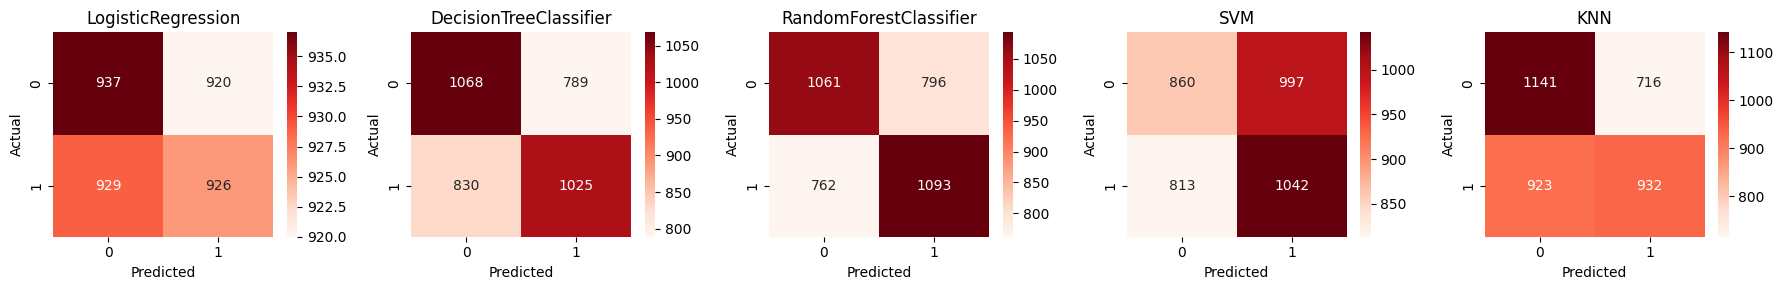

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(18, 3))

for i in range(len(models)):
    sns.heatmap(cfm[i], annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(list(models.keys())[i])

plt.tight_layout()
plt.show()

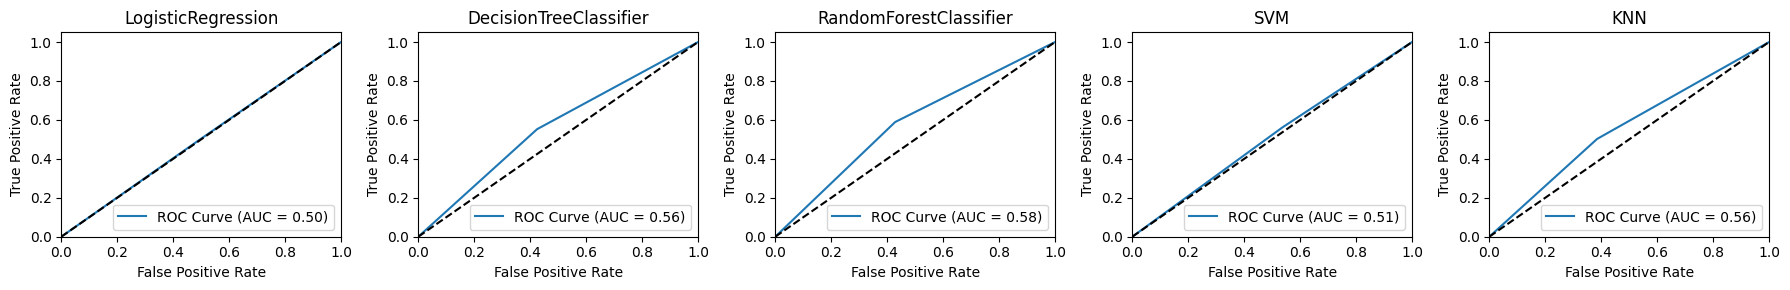

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(18, 3))
for i in range(len(models)):
    axes[i].plot(auc_c[i][0], auc_c[i][1], label=f'ROC Curve (AUC = {auc_scr[i]:.2f})') #FPR, TPR
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(list(models.keys())[i])
    axes[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

### Nhận xét

True Positives: Đây là những cá nhân được dự đoán chính xác là có nguy cơ bị đau tim.
True Negatives: Đây là những cá nhân được dự đoán chính xác là không có nguy cơ bị đau tim.
False Positive: Đây là những cá nhân bị dự đoán sai là có nguy cơ bị đau tim.
False Negative: Đây là những cá nhân bị dự đoán sai là không có nguy cơ bị đau tim.
Các bài toán về chẩn đoán nguy cơ sẽ ưu tiên Recall hơn.

-Các bước Resampling -> Chia data -> Standardize cho kết quả tối ưu với tất cả model.
-RandomForest cho kết quả tốt nhất về nhiều chỉ số, và tốt trong cả trường hợp chọn lọc top 4 tính năng.
-Các features được chọn làm giảm độ chính xác, cân nhắc về việc đánh đổi giữa các yếu tố.
+Chọn lọc các features đầu vào (10/24 features, 67 -> 61%)
+Chỉ chọn các features thân thiện với người dùng, không cần thiết bị y khoa (4/24 features, 67 -> 58%).
*Điều đặc biệt là khi chọn 4 features này với model RF và SVM thì chỉ số FP > FN, khá tốt với chẩn đoán y khoa. Trong khi All features thì chỉ có model DTr đạt được.

# Test

In [ ]:
def dicti_vals(dicti):
    x = list(dicti.values())
    x = np.array([x])
    return x

In [ ]:
def determine_lifestyle_changes(predict_type, dictionary):
    lifestyle_changes = []
    if predict_type > 0:
        if 'Sleep Hours Per Day' in new_person and new_person['Sleep Hours Per Day'] in [4,5,6,8]:
            lifestyle_changes.append('Cân nhắc về thời gian ngủ bạn nhé!')
        if 'Alcohol Consumption' in new_person and new_person['Alcohol Consumption'] == 1:
            lifestyle_changes.append('Hạn chế bia rượu bạn nhé!')
        if 'Diabetes' in new_person and new_person['Diabetes'] == 1:
            lifestyle_changes.append('Hạn chế ăn đồ ngọt và đường, bột!')
        if 'Obesity' in new_person and new_person['Obesity'] == 1:
            lifestyle_changes.append('Giảm cân bạn nhé!')
        print("Nguy cơ tim mạch: ", predict_type)
        for i in lifestyle_changes:
            print(f"{i}")
        print("Điều này có thể làm giảm nguy cơ tim mạch của bạn.")

    if predict_type > 0.75:
        print("Bạn cần sự tư vấn của bác sĩ càng sớm càng tốt!")
        print("Nguy cơ tim mạch: ", predict_type)

## All features

In [ ]:
new_person = {'Age': 21, 'Cholesterol': 324, 'BP_systolic': 174, 'BP_diastolic': 99, 'Heart Rate': 72,
       'Diabetes': 1, 'Family History': 0, 'Smoking': 1, 'Obesity': 1,
       'Alcohol Consumption':0, 'Exercise Hours Per Week': 2.07, 'Sedentary Hours Per Day':9.12,
       'Previous Heart Problems':1, 'Medication Use':1, 'Stress Level':6,
        'BMI': 28.17, 'Triglycerides': 587, 'Income': 71276,
       'Sleep Hours Per Day' : 4, 'Physical Activity Days Per Week':1,
       'Sex_1': 1, 'Sex_0': 0, 'Diet': 1}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

array([[2.1000e+01, 3.2400e+02, 1.7400e+02, 9.9000e+01, 7.2000e+01,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0700e+00, 9.1200e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00,
        2.8170e+01, 5.8700e+02, 7.1276e+04, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00]])

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

obj = models['RandomForestClassifier']
obj.fit(X_train, y_train)

# y_pred = obj.predict(x)

RandomForestClassifier()

In [ ]:
predict_type = obj.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Nguy cơ tim mạch:  [0.41]
Cân nhắc về thời gian ngủ bạn nhé!
Hạn chế ăn đồ ngọt và đường, bột!
Giảm cân bạn nhé!
Điều này có thể làm giảm nguy cơ tim mạch của bạn.


## Top 4 features

In [ ]:
new_person = {'Diabetes': 1, 'Obesity': 1,'Alcohol Consumption':0, 'Sleep Hours Per Day' : 4}
dict1 = pd.DataFrame([new_person])
x = dicti_vals(new_person)
x

array([[1, 1, 0, 4]])

In [ ]:
smote = SMOTE(random_state = 50)
X_resample, y_resample = smote.fit_resample(X_r, y)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,random_state = 42,test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

obj = models['RandomForestClassifier']
obj.fit(X_train, y_train)

# y_pred = obj.predict(x)

RandomForestClassifier()

In [ ]:
predict_type = obj.predict_proba(x)[:, 1]
result = determine_lifestyle_changes(predict_type, new_person)
result

Nguy cơ tim mạch:  [0.33]
Cân nhắc về thời gian ngủ bạn nhé!
Hạn chế ăn đồ ngọt và đường, bột!
Giảm cân bạn nhé!
Điều này có thể làm giảm nguy cơ tim mạch của bạn.


In [ ]:
# Model training
RFR.fit(X_train_s, y_train_s)

# Predictions
y_train_pred = RFR.predict(X_train_s)
y_test_pred = RFR.predict(X_test_s)

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test_s,'Predicted Value':y_test_pred})
def get_per(df):
    if df['Actual Value']>df['Predicted Value']: maxxx = df['Actual Value']
    else: maxxx = df['Predicted Value']
    return round(100*(1 - abs(df['Actual Value']-df['Predicted Value'])/maxxx),2)

pred_df['Accuracy']=pred_df.apply(get_per,axis=1)
pred_df.head()

,Actual Value,Predicted Value,Accuracy
15,30760.000,35933.900000,85.60
9,17859.167,18742.910000,95.28
100,9549.000,9401.480000,98.46
132,11850.000,13000.138333,91.15
68,28248.000,27736.780000,98.19
